# Multi Linear Regression 
Multiple linear regression is an extension of simple linear regression, where you have more than one independent variable (predictor) to predict a dependent variable (target). The basic idea is to fit a linear equation to the data, but instead of a single slope and intercept, you have multiple coefficients for each independent variable.

### Model Representation
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + ... + \beta_n x_n 
$$

From this we get to know it is a linear equation with multiple variables. Here, $y$ is the dependent variable and $x_1, x_2, x_3, ..., x_n$ are the independent variables. $\theta_0$ is the intercept and $\theta_1, \theta_2, \theta_3, ..., \theta_n$ are the coefficients.

### Finding Cofficients
Ordinary Least Squares method is used to find the coefficients. The objective is to minimize the sum of squared errors (SSE) or mean squared error (MSE). The coefficients are calculated by minimizing the cost function.

In [2]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("heart_data.csv")
df.head(5)

,Unnamed: 0,biking,smoking,heart.disease
0,1,30.801246,10.896608,11.769423
1,2,65.129215,2.219563,2.854081
2,3,1.959665,17.588331,17.177803
3,4,44.800196,2.802559,6.816647
4,5,69.428454,15.974505,4.062224


In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   biking         498 non-null    float64
 1   smoking        498 non-null    float64
 2   heart.disease  498 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


In [4]:
df.tail(5)

,biking,smoking,heart.disease
493,47.660440,27.562464,11.294392
494,45.097203,21.385620,9.616762
495,8.279743,6.423720,13.495168
496,42.345863,20.741328,10.115865
497,30.774254,23.610175,11.843556


### Storage Units for Computer
- bit = 1
- byte = 8 * bit
- kiloByte = 1024 * byte
- megaByte = 1024 * kiloByte
- gigaByte = 1024 * megaByte
- teraByte = 1024 * gigaByte

In [5]:
df.describe()

,biking,smoking,heart.disease
count,498.000000,498.000000,498.000000
mean,37.788411,15.435034,10.174538
std,21.481519,8.289959,4.571874
min,1.119154,0.525850,0.551898
25%,20.204598,8.279776,6.513683
50%,35.824459,15.814614,10.385255
75%,57.852786,22.568925,13.724024
max,74.907111,29.946743,20.453496


In [8]:
# df.corrwith(df["heart.disease"]).plot.bar(figsize=(20,10),title="Correlation with Heart Disease",fontsize=15,rot=45,grid=True)
df.corrwith(df["heart.disease"])

biking          -0.935455
smoking          0.309131
heart.disease    1.000000
dtype: float64

<Axes: >

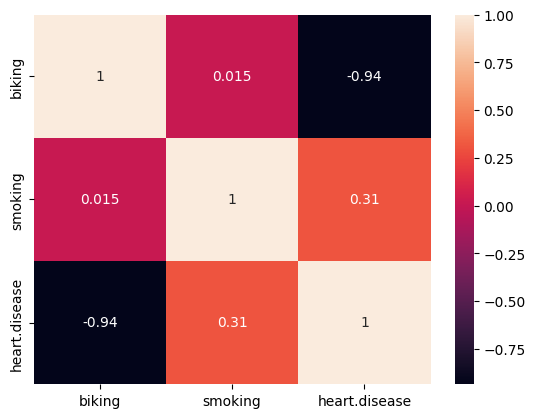

In [10]:
sns.heatmap(df.corr(), annot=True,)

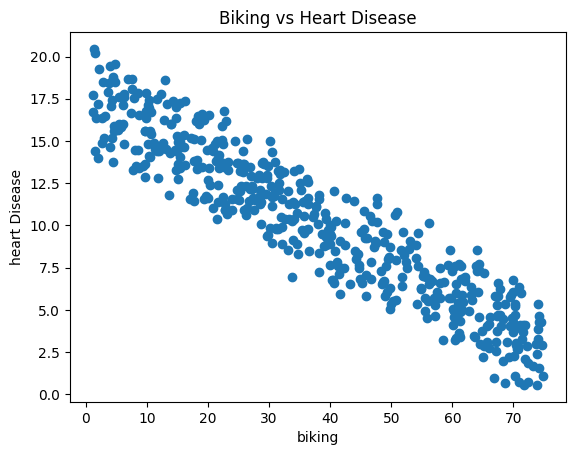

In [11]:
plt.title("Biking vs Heart Disease")
plt.scatter(df["biking"], df["heart.disease"])
plt.xlabel("biking")
plt.ylabel("heart Disease")
plt.show()


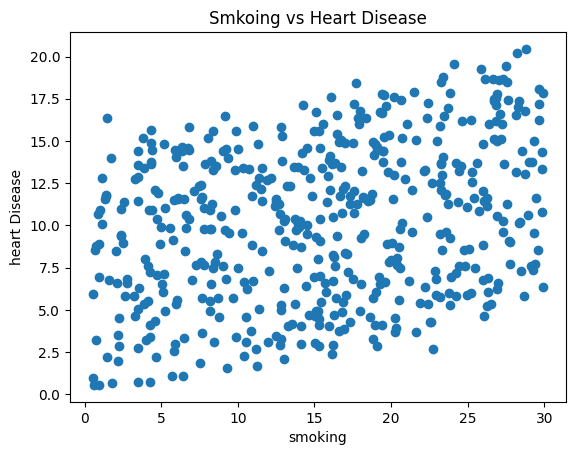

In [12]:
plt.title("Smkoing vs Heart Disease")
plt.scatter(df["smoking"], df["heart.disease"])
plt.xlabel("smoking")
plt.ylabel("heart Disease")
plt.show()

In [14]:
# Lineaer Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Single Linear Regression
model.fit(df[["biking"]], df["heart.disease"])
c = model.intercept_
m = model.coef_[0]
print("Intercept:", c)
print("Coefficient:", m)

Intercept: 17.697884340304185
Coefficient: -0.19909136369323066


In [16]:
x = float(input("Enter time which you ride a bike: "))
y = m*x + c 
print("Heart Disease:", y)

Heart Disease: 11.565622270713519


In [17]:
# Multi Linear Regression
model.fit(df[["biking", "smoking"]], df["heart.disease"])
c = model.intercept_
m = model.coef_
print("Intercept:", c)
print("Coefficient:", m)

Intercept: 14.984657987225848
Coefficient: [-0.20013305  0.17833391]


In [18]:
x1 = float(input("Enter time which you ride a bike: "))
x2 = float(input("Enter time which you smoke: "))

y = m[0]*x1 + m[1]*x2 + c
print("Heart Disease:", y)
# 30.801246
# 10.896608

Heart Disease: 10.763545373318006
